In this notebook, I will explore the variables of the dataset and how they relate to each other.<br>
Particular attention will be placed on the relation between the target variable and the different predictors.<br>
I will be using statical methods on resampled data, that I will create through permuatation and bootstraping methods.<br>
The notebook will end with a look at some correlation coefficients and the estimates of their confidence intervals.

In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


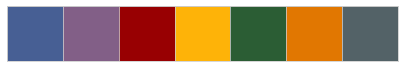

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# read in actor dataset
df = pd.read_json('../data/capstone2_ds.json')

In [6]:
# observe a bit of the data
df.head().transpose()

,2,3,4,5,6
revenue,1.032727e+09,4.376895e+08,7.803955e+08,1.147836e+09,1.471965e+09
budget,8.725710e+07,8.557983e+07,7.547966e+07,2.398909e+07,1.007536e+08
age,4.668380e+01,5.513486e+01,4.017787e+01,5.970645e+01,4.475702e+01
gender,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
order,8.181818e-01,7.619048e-01,3.000000e+00,1.666667e+00,5.666667e+00
popularity,4.413291e+01,2.541143e+01,3.299827e+01,3.716733e+01,6.011667e+01
release_date,1.997818e+03,1.997190e+03,1.996467e+03,1.972667e+03,1.990333e+03
runtime,1.128182e+02,1.190000e+02,1.152000e+02,9.766667e+01,1.323333e+02
usa,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
vote_average,7.145455e+00,6.730952e+00,6.660000e+00,7.400000e+00,7.483333e+00


In [7]:
# recall features
df.columns

Index(['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

I will separate out the movie genre features to focus on the predictors that were the results of aggregation by averages.

In [8]:
# create list of non-genre feature names
non_genre_lst = ['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [9]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [10]:
# observe non-genre statistics
df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,1.386641e+08,2.847504e+08,1.24,75897223.77,7.377968e+09
budget,3.952939e+07,3.619484e+07,1.60,31313680.34,3.196471e+08
age,3.786000e+01,1.400000e+01,1.18,36.15,9.896000e+01
gender,3.900000e-01,4.900000e-01,0.00,0.00,1.000000e+00
order,4.420000e+00,2.110000e+00,0.00,4.50,8.000000e+00
popularity,1.326000e+01,8.070000e+00,0.60,12.87,2.052800e+02
release_date,1.996120e+03,2.029000e+01,1913.00,2002.60,2.020000e+03
runtime,1.079500e+02,1.764000e+01,70.00,105.67,2.480000e+02
usa,4.500000e-01,5.000000e-01,0.00,0.00,1.000000e+00
vote_average,6.400000e+00,8.400000e-01,1.00,6.40,1.000000e+01


I will point out a few statistics from the data.<br>
Male actors comprised just over 60% of all observations.<br>
The average movie budget is $39,529,390.<br>
The average actor age at the time of movie release is 37.9 years.<br>
Although the movies go back as far as 1913, the average release year is 1996.

Finally, the actor career movie revenues average to $138,664,100.

In [11]:
# observe genre statistics
df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.97,1.98,0.0,0.0,38.0
adventure,0.67,1.44,0.0,0.0,23.0
animation,0.18,0.66,0.0,0.0,11.0
comedy,1.28,2.49,0.0,1.0,34.0
crime,0.58,1.36,0.0,0.0,27.0
drama,1.64,2.81,0.0,1.0,33.0
family,0.38,0.98,0.0,0.0,15.0
fantasy,0.36,0.90,0.0,0.0,17.0
history,0.16,0.52,0.0,0.0,9.0
horror,0.40,0.77,0.0,0.0,11.0


The odds of an actor appearing in either a comedy or drama film is greater than 1.<br>
Action and thriller movies aren't far behind, in this respect.<br>
Actors have the lowest odds of being in a western movie.

I will start by analyzing a possible correlation between an actor's age and that actor's gender.

 > **Age vs. Gender**

In [12]:
def pearson_r(data1, data2):
    """Compute correlation coefficient between 2 arrays"""
    corr_mat = np.corrcoef(data1, data2)
    
    return corr_mat[0, 1]

In [13]:
# get the correlation coefficient between actor age and gender
pearson_r(df['age'], df['gender'])

-0.22016862055029235

There is a moderate, negative Pearson correlation coefficient, between the two predictors.<br>
I will explore this, further.

In [14]:
# split age variable by gender and make into two Series
male_age = df.loc[df['gender'] == 0]['age']
female_age = df.loc[df['gender'] == 1]['age']

In [15]:
# observe mean and quartiles
pd.DataFrame([male_age.rename('male').describe(), female_age.rename('female').describe()], 
             columns=male_age.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,7110.0,40.336032,13.939950,1.182776,30.754225,39.863926,49.460975,98.961649
female,4583.0,34.020767,13.215305,2.327221,25.459797,31.513994,40.342375,92.231873


The average age of male actors is 6 years older than the that of female actors.

I will normalize the data and plot the distributions.

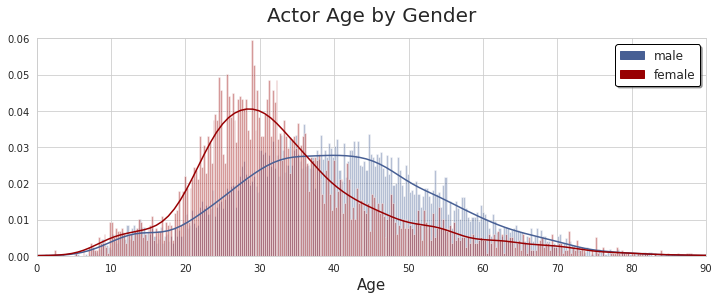

In [16]:
# plot age distributions of genders

plt.xlim(0, 90)
plt.ylim(0, 0.06)

sns.distplot(male_age, norm_hist=True, bins=350, color=mp.colors(0))
sns.distplot(female_age, norm_hist=True, bins=350, color=mp.colors(2))

plt.xlabel('Age', fontsize=15)

# make color keys for legend
blue_patch = mpatches.Patch(color=mp.colors(0), label='male')
red_patch = mpatches.Patch(color=mp.colors(2), label='female')

plt.legend(handles=[blue_patch, red_patch], fontsize='large', 
           fancybox=True, shadow=True, edgecolor='k')
plt.title('Actor Age by Gender', fontsize=20, y=1.05);

The plot shows the female actors getting more of their roles at a younger age than the male actors.<br>
Also, there is bimodality in the distributions of both genders, indicating a decline in the number of roles for teen actors.

I will conduct a hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of ages between male and female actors.<br>
H_A: There is a significant difference in the distribution of ages between male and female actors.

In [17]:
def perm_sample(data1, data2):
    """Generate permutation samples for 2 arrays"""
    # combine arrays
    data = np.concatenate((data1, data2))
    # permutate data
    perm_data = np.random.permutation(data)
    # draw samples with replacement
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[:len(data2)]
    
    return perm_sample_1, perm_sample_2

In [18]:
def draw_perm_samples(data1, data2, size=1):
    """Generate permutation samples multiple times"""
    for _ in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        
    return perm_samp_1, perm_samp_2

In [19]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male, perm_sample_female = draw_perm_samples(male_age, female_age, size=10000)

In [20]:
def ecdf(data):
    """Compute Emperical Cumulative Distribution Function for 1-Dim array"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    
    return x, y

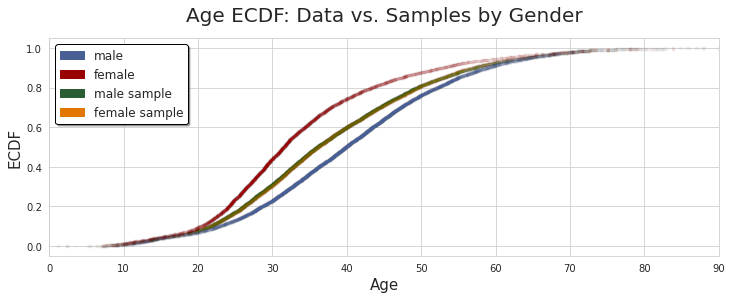

In [21]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(0, 90)

x_1, y_1 = ecdf(perm_sample_male)
x_2, y_2 = ecdf(perm_sample_female)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.01)

x_1, y_1 = ecdf(male_age)
x_2, y_2 = ecdf(female_age)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.xlabel('Age', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

# make color keys for legend
green_patch = mpatches.Patch(color=mp.colors(4), label='male sample')
orange_patch = mpatches.Patch(color=mp.colors(5), label='female sample')

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], 
           fontsize='large', fancybox=True, shadow=True, edgecolor='k')

plt.title('Age ECDF: Data vs. Samples by Gender', fontsize=20, y=1.05);

The permutation samples overlap to make the pea soup colored curve in the middle.<br>
Between ages 20 and 60, the observed data does not overlap with the samples.<br>
The null hypothesis is not commensurate with the data.<br>
Let's put some numbers on that statement.<br>
I will compare the actors' mean age difference.

In [22]:
def diff_of_means(data1, data2):
    """Calculate the difference of the means of 2 arrays"""
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

In [23]:
# get observed mean age difference
mean_age_diff_obs = diff_of_means(male_age, female_age)

In [24]:
# get average mean age difference of data
f'Data age difference: {mean_age_diff_obs:.1f} years.'

'Data age difference: 6.3 years.'

In [25]:
# get average mean age difference of samples
f'Sample age difference: {diff_of_means(perm_sample_male, perm_sample_female):.1f} years.'

'Sample age difference: -0.1 years.'

The evidence is strong against the null hypothesis.<br>
I will calculate the probability of getting at least a mean age difference of 6.3 years under the null hypothesis.

In [26]:
def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates"""
    # instantiate replicates array
    perm_reps = np.empty(size)
    for i in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        perm_reps[i] = func(perm_samp_1, perm_samp_2)
        
    return perm_reps

In [27]:
# create replicates of mean age difference
np.random.seed(27)
perm_reps_age = draw_perm_reps(male_age, female_age, diff_of_means, size=10000)

In [28]:
# compute p-value
p_chance = np.sum(perm_reps_age >= mean_age_diff_obs) / len(perm_reps_age)
f'The p-value is: {p_chance}.'

'The p-value is: 0.0.'

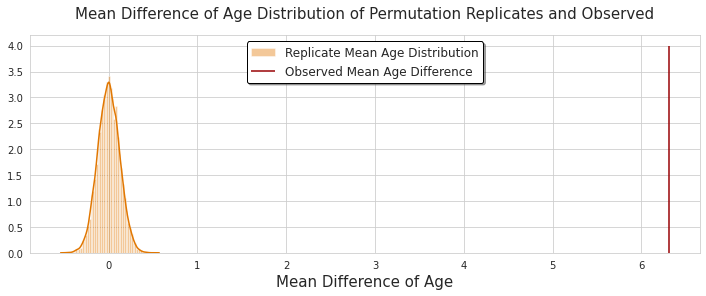

In [29]:
# plot permutation replicates and compare with observed mean difference

plt.vlines(mean_age_diff_obs, ymin=0, ymax=4, colors=mp.colors(2), 
           label='Observed Mean Age Difference')
sns.distplot(perm_reps_age, color=mp.colors(5), 
             label='Replicate Mean Age Distribution')

plt.xlabel('Mean Difference of Age', fontsize=15)

plt.legend(loc=9, fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title(
    'Mean Difference of Age Distribution of Permutation Replicates and Observed', 
          fontsize=15, y=1.05);

The probability is very low that we will see at least a difference of 6.3 years by chance when the distibutions are the same.

Now, I will perform a two-sample bootstrap hypothesis test for the difference of the mean age of actors.<br>
This is testing to see if the genders have the same mean age, but not necessarily the same distribution.

H_0: There is not a significant difference in the mean of age between male and female actors.<br>
H_A: There is a significant difference in the mean of age between male and female actors.

In [30]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    # instantiate replicates array
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, len(data)))
        
    return bs_reps

In [31]:
# get mean of all ages
mean_age = np.mean(df['age'])

In [32]:
# generate shifted arrays having same mean
male_shifted = male_age - np.mean(male_age) + mean_age
female_shifted = female_age - np.mean(female_age) + mean_age 

In [33]:
# get 10,000 bootstrap replicates from shifted arrays
N = 10000
bs_reps_male = draw_bs_reps(male_shifted, np.mean, N)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, N)

In [34]:
# get replicates of difference of means
bs_reps = bs_reps_male - bs_reps_female

In [35]:
# get p-value
p_diff = np.sum(bs_reps >= mean_age_diff_obs) / N
f'The p-value is: {p_diff}.'

'The p-value is: 0.0.'

This is the fraction of replicates with a difference in means greater than or equal to the observed difference of 6.3 years.<br>

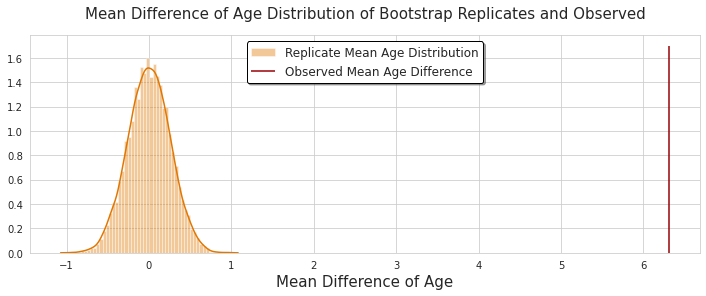

In [36]:
# plot bootstrap replicates and compare with observed mean difference

plt.vlines(mean_age_diff_obs, ymin=0, ymax=1.7, colors=mp.colors(2), 
           label='Observed Mean Age Difference')
sns.distplot(bs_reps, color=mp.colors(5), 
             label='Replicate Mean Age Distribution')

plt.xlabel('Mean Difference of Age', fontsize=15)

plt.legend(loc=9, fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title(
    'Mean Difference of Age Distribution of Bootstrap Replicates and Observed', 
          fontsize=15, y=1.05);

Similarly, this null hypothesis concerning the difference in mean ages of actors is highly unlikely.

Both the distribution and the mean of average actor ages is significantly different between the genders.

 > **Revenue vs. Gender**

Now, let's look at the distribution of the dependent variable, revenue.<br>
This is the average movie revenue in which actors were featured, over their careers.

In [37]:
# get the correlation coefficient between actor revenue and gender
pearson_r(df['revenue'], df['gender'])

-0.017750348664422745

There is a very weak negative correlation.

In [38]:
# split dependent variable by gender and put into Series
male_val = df.loc[df['gender'] == 0]['revenue']
female_val = df.loc[df['gender'] == 1]['revenue']

In [39]:
# observe mean and quartiles
pd.DataFrame([male_val.rename('male').describe(), female_val.rename('female').describe()], 
             columns=male_val.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,7110.0,1.427219e+08,2.609139e+08,8.586660,2.814573e+07,8.140918e+07,1.720498e+08,7.377968e+09
female,4583.0,1.323689e+08,3.181436e+08,1.238841,1.935936e+07,6.689533e+07,1.473211e+08,7.377968e+09


The male actors have a higher mean value than the female actors.

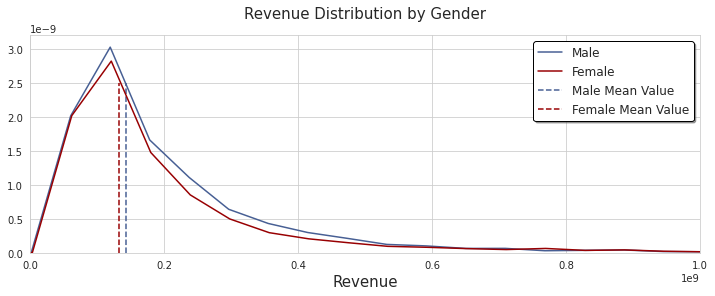

In [40]:
# plot revenue distributions of genders

plt.xlim(0, 1e9)
plt.ylim(0, 3.2e-9)

plt.vlines(x=np.mean(male_val), ymin=0, ymax=2.5e-9, color=mp.colors(0), 
           label='Male Mean Value', linestyles='dashed')
sns.kdeplot(male_val,color=mp.colors(0), label='Male')

plt.vlines(x=np.mean(female_val), ymin=0, ymax=2.5e-9, color=mp.colors(2), 
           label='Female Mean Value', linestyles='dashed')
sns.kdeplot(female_val, color=mp.colors(2),label='Female')

plt.xlabel('Revenue', fontsize=15)

plt.legend(fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue Distribution by Gender', fontsize=15, y=1.05);

The distributions are close in shape, but the female actors cluster at slightly lower revenues.<br>
I'll do more ECDF comparision.

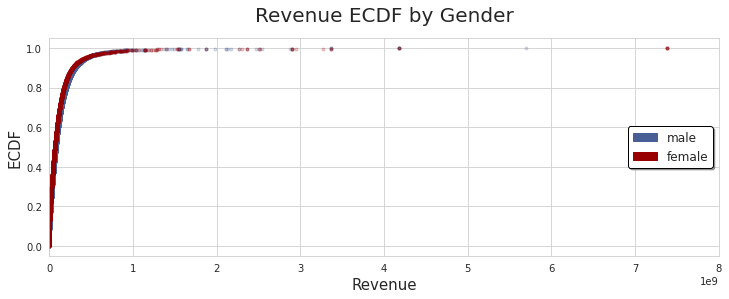

In [41]:
# plot Emperical Cumulative Distribution Functions for revenue by gender

plt.xlim(0, 8e9)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.2)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.2)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

plt.legend(handles=[blue_patch, red_patch], loc=5, fontsize='large', 
           fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue ECDF by Gender', fontsize=20, y=1.05);

The ECDFs are overlapping from this view.<br>
Let's look closer where the values diverge near the top.

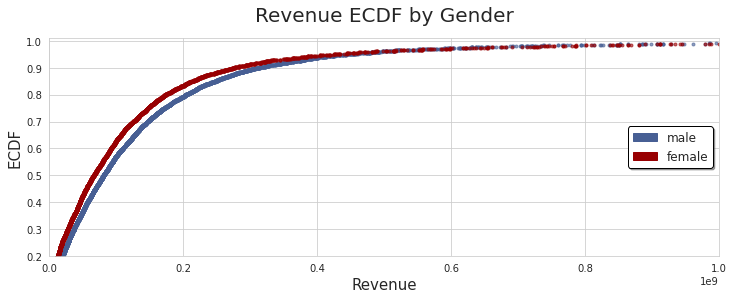

In [42]:
# plot Emperical Cumulative Distribution Functions for revenue by gender

# zoom in where distributions begin to diverge
plt.xlim(0, 1e9)
plt.ylim(0.2, 1.01)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.6)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.6)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

plt.legend(handles=[blue_patch, red_patch], loc=5, fontsize='large', 
           fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue ECDF by Gender', fontsize=20, y=1.05);

Here we can see where the female actors are counting a greater portion of their numbers at lower values than the men.<br>
From this plot, it would appear that the distributions are not the same.

I will conduct another hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of revenues between male and female actors.<br>
H_A: There is a significant difference in the distribution of revenues between male and female actors.

In [43]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male_val, perm_sample_female_val = draw_perm_samples(
    male_val, female_val, size=10000)

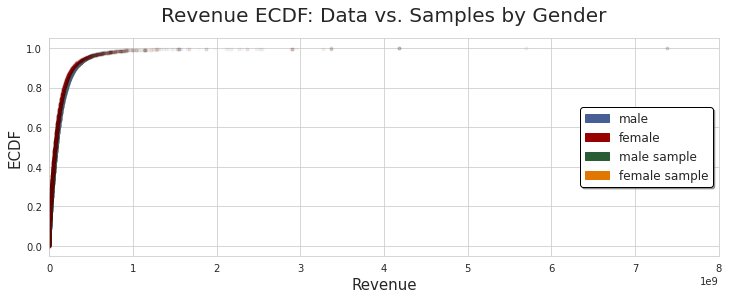

In [44]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(0, 8e9)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.02)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=5, 
           fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue ECDF: Data vs. Samples by Gender', fontsize=20, y=1.05);

The sample curves overlay tightly.<br>
Let's zoom in to observe the data.

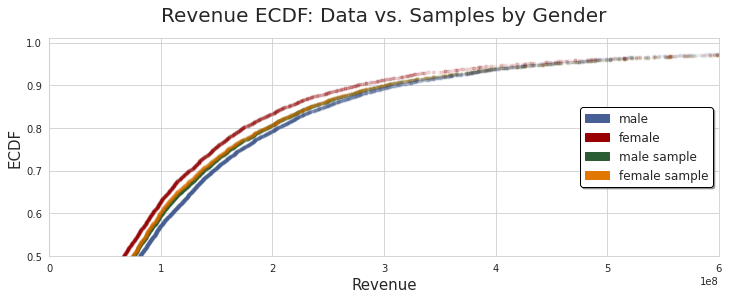

In [45]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in where distributions begin to diverge

plt.xlim(0, 6e8)
plt.ylim(0.5, 1.01)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.05)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.05)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=5, 
           fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue ECDF: Data vs. Samples by Gender', fontsize=20, y=1.05);

The samples coincide in this range, unlike the observed actor data.<br>
There is a clear distinction between the distributions of samples and the true data.

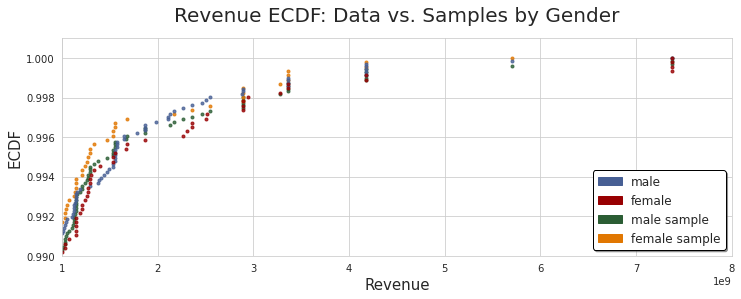

In [46]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in on actors with highest values
plt.xlim(1e9, 8e9)
plt.ylim(0.99, 1.001)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(4) , alpha=0.8)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(5), alpha=0.8)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.8)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.8)

plt.xlabel('Revenue', fontsize=15)
plt.ylabel('ECDF', fontsize=15)

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch], loc=4, 
           fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title('Revenue ECDF: Data vs. Samples by Gender', fontsize=20, y=1.05);

The separation between the sample genders (green and yellow) and the true observations (blue and red) appears similar.

Now, I will compare the mean revenue difference.

In [47]:
# get observed mean revenue difference
mean_val_diff_obs = diff_of_means(male_val, female_val)

In [48]:
# get average mean revenue difference of data
f'Data difference: ${mean_val_diff_obs:,.2f}.'

'Data difference: $10,353,065.12.'

In [49]:
# get average mean revenue difference of samples
f'Sample difference: ${diff_of_means(perm_sample_male_val, perm_sample_female_val):,.2f}.'

'Sample difference: $4,472,494.68.'

From these means, it is unclear if I can rule out the null hypothesis.<br>
It's time to use statistics.<br>
I'll calculate the probability of getting a mean revenue difference of $10,353,065.12 or more under the null hypothesis.

In [50]:
# create replicates of mean revenue difference
np.random.seed(27)
perm_reps_val = draw_perm_reps(male_val, female_val, diff_of_means, size=10000)

In [51]:
# compute p-value
p_val = np.sum(perm_reps_val >= mean_val_diff_obs) / len(perm_reps_val)
f'The p-value is: {p_val}.'

'The p-value is: 0.0001.'

There was one sample in 10,000 that observed a mean value this extreme.

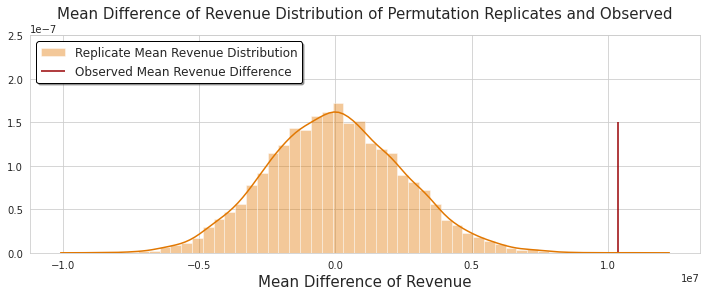

In [52]:
# plot permutation replicates and compare with observed mean difference

plt.ylim(0, 2.5e-7)

plt.vlines(mean_val_diff_obs, ymin=0, ymax=1.5e-7, colors=mp.colors(2), 
           label='Observed Mean Revenue Difference')
sns.distplot(perm_reps_val, color=mp.colors(5), 
             label='Replicate Mean Revenue Distribution')

plt.xlabel('Mean Difference of Revenue', fontsize=15)

plt.legend(loc=2, fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title('Mean Difference of Revenue Distribution of Permutation Replicates and Observed',
          fontsize=15, y=1.05);

It's highly unlikely to see at least a difference of $10,353,065.12 by chance when the distibutions are the same.<br>
The null hypothesis can be rejected.

I can be confident that there is a real difference in average revenue between the genders.

In the final section, I will find the confidence intervals for the Pearson correlation coefficients between the variables.

 > **Correlations**

I will observe the Pearson coefficients between predictors and the target, and between a few predictors, themselves.<br>
Then, I will estimate the 95% confidence interval for that value by creating 10,000 pairs bootstrap replicates.

I will start where I left off by testing the correlation between revenue and gender.

 > **Revenue/Gender Correlation**

In [53]:
def draw_bs_pairs(data1, data2, func, size=1):
    """Perform pairs bootstrap for a single statistic."""
    # convert Series to numpy array
    x = np.array(data1)
    y = np.array(data2)
    # get array of indices for sampling
    inds = np.arange(len(x))
    # initialize pairs replicates
    bs_replicates = np.empty(size)
    # generate pairs replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [54]:
# get observed correlation coefficient between revenue and gender
corr_obs_rev_gender = pearson_r(df['revenue'], df['gender'])

# get Pearson coefficients of 10,000 bootstrap replicate pairs
corr_replicates_rev_gender = draw_bs_pairs(df['revenue'], df['gender'], pearson_r, 10000)

# compute Pearson coefficient with 95% confidence intervals
conf_int_rev_gender = np.percentile(corr_replicates_rev_gender, [2.5, 97.5])

print('Observed coefficient: {}\n95% confidence intervals: {}.'
      .format(np.round(corr_obs_rev_gender, decimals=3), 
              np.round(conf_int_rev_gender, decimals=3)))

Observed coefficient: -0.018
95% confidence intervals: [-0.038  0.002].


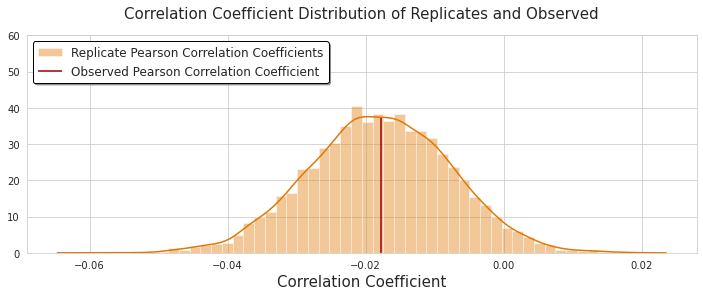

In [55]:
# plot permutation replicates and compare with observed correlation

plt.ylim(0, 60)

plt.vlines(corr_obs_rev_gender, ymin=0, ymax=37.5, colors=mp.colors(2), 
           label='Observed Pearson Correlation Coefficient')
sns.distplot(corr_replicates_rev_gender, color=mp.colors(5), 
             label='Replicate Pearson Correlation Coefficients')

plt.xlabel('Correlation Coefficient', fontsize=15)

plt.legend(loc=2, fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title(
    'Correlation Coefficient Distribution of Replicates and Observed', 
    fontsize=15, y=1.05);

Although there is a real difference between actor revenues with respect to gender, the correlation is very small.

Now, I'll look at the correlation between the other variables that I analyzed, above.

 > **Age/Gender Correlation**

In [56]:
# get observed correlation coefficient between age and gender
corr_obs_age_gender = pearson_r(df['age'], df['gender'])

# get Pearson coefficients of 10,000 bootstrap replicate pairs
corr_replicates_age_gender = draw_bs_pairs(df['age'], df['gender'], pearson_r, 10000)

# compute Pearson coefficient with 95% confidence intervals
conf_int_age_gender = np.percentile(corr_replicates_age_gender, [2.5, 97.5])

print('Observed coefficient: {}\n95% confidence intervals: {}.'
      .format(np.round(corr_obs_age_gender, decimals=3), 
              np.round(conf_int_age_gender, decimals=3)))

Observed coefficient: -0.22
95% confidence intervals: [-0.238 -0.203].


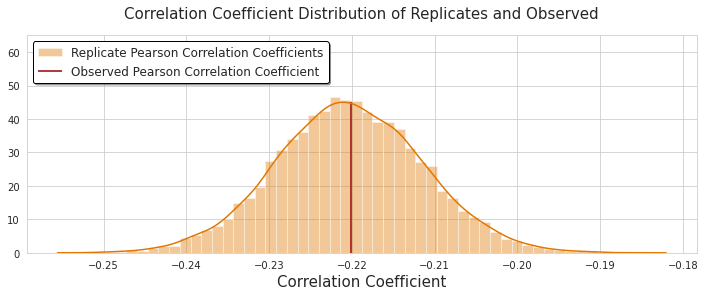

In [57]:
# plot permutation replicates and compare with observed correlation

plt.ylim(0, 65)

plt.vlines(corr_obs_age_gender, ymin=0, ymax=45, colors=mp.colors(2), 
           label='Observed Pearson Correlation Coefficient')
sns.distplot(corr_replicates_age_gender, color=mp.colors(5), 
             label='Replicate Pearson Correlation Coefficients')

plt.xlabel('Correlation Coefficient', fontsize=15)

plt.legend(loc=2, fontsize='large', fancybox=True, shadow=True, edgecolor='k')
plt.title(
    'Correlation Coefficient Distribution of Replicates and Observed', 
    fontsize=15, y=1.05);

There is a weak negative correlation between age and gender, but it is stronger than the one between revenue and gender.